In [1]:
import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
import os
import seaborn as sns



In [2]:

cur_dir = os.path.dirname(os.path.abspath('.'))
cnt_params = {}

task0_acc_load_path = './visualization-tradeoff/task0_temp.csv'
task0_acc_load_path = os.path.join(cur_dir, task0_acc_load_path)
task0_acc = pd.read_csv(task0_acc_load_path)
    
task1_acc_load_path = './visualization-tradeoff/task1_temp.csv'
task1_acc_load_path = os.path.join(cur_dir, task1_acc_load_path)
task1_acc = pd.read_csv(task1_acc_load_path)
    
print()


/tmp/ipykernel_1657978/3551358209.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=15, fontweight='bold')
/tmp/ipykernel_1657978/3551358209.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=15, fontweight='bold')


Save figures to /dev_data/zjh/LLM_CL/visualization_sota


<Figure size 640x480 with 0 Axes>

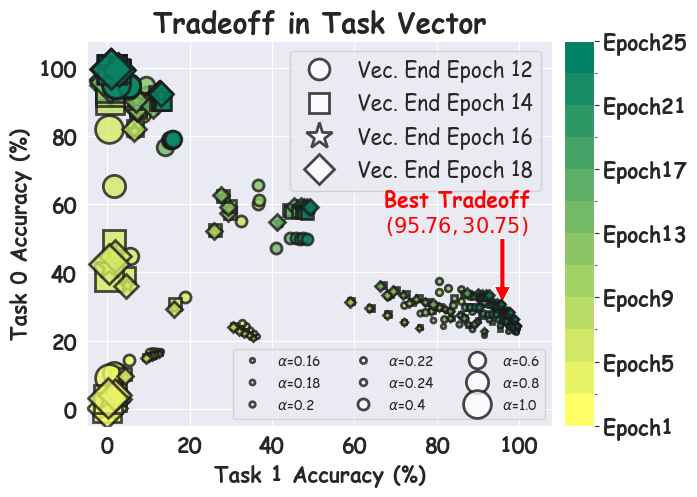

In [3]:
sns.set_theme(None)
plt.clf()
plt.rcParams['font.sans-serif'] = 'Comic Sans MS'
fig, ax = plt.subplots(figsize=(6,5))

cmap = plt.get_cmap('summer_r')

n_epochs = 25
model_to_be_modified_epoch_id_list = list(range(1,25+2,2))
task_vector_end_epoch_id_list = [12,14,16,18]
task_vetor_alpha_list = [0.16,0.18,0.20,0.22,0.24,0.4,0.6,0.8,1.0]

task_vector_end_epoch_id2marker = {
    12: 'o',
    14: 's',
    16: '*',
    18: 'D'
}
task_vector_end_epoch_id2legendsize = {
    12: 15,
    14: 15,
    16: 20,
    18: 15
}

for model_to_be_modified_epoch_id in model_to_be_modified_epoch_id_list:
    for task_vector_end_epoch_id in task_vector_end_epoch_id_list:
        for task_vetor_alpha in task_vetor_alpha_list:
            _x = task1_acc[f'epoch_of_task_vector_{task_vector_end_epoch_id}_alpha_{task_vetor_alpha}'][model_to_be_modified_epoch_id//2]
            _y = task0_acc[f'epoch_of_task_vector_{task_vector_end_epoch_id}_alpha_{task_vetor_alpha}'][model_to_be_modified_epoch_id//2]
            plt.plot([_x],[_y],
                    marker=task_vector_end_epoch_id2marker[task_vector_end_epoch_id],
                    markersize=task_vetor_alpha*20,
                    markerfacecolor=cmap((model_to_be_modified_epoch_id-model_to_be_modified_epoch_id_list[0])/n_epochs),
                    markeredgecolor='k',
                    markeredgewidth=2,
                    alpha=0.8,
                    zorder=5
                    )


# Only for plotting the color bar
bins = [(model_to_be_modified_epoch_id-1)/(n_epochs-1) for model_to_be_modified_epoch_id in model_to_be_modified_epoch_id_list]
nbin = len(bins) - 1
cmap_bins = plt.get_cmap('summer_r',nbin)
norm_cmap = matplotlib.colors.BoundaryNorm(bins, nbin)
im = matplotlib.cm.ScalarMappable(norm=norm_cmap, cmap=cmap_bins)
def add_right_cax(ax, pad, width):
    '''
    在一个ax右边追加与之等高的cax.
    pad是cax与ax的间距.
    width是cax的宽度.
    '''
    axpos = ax.get_position()
    caxpos = matplotlib.transforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)
    return cax
cax = add_right_cax(ax, pad=0.02, width=0.05)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_ticklabels([f'Epoch{model_to_be_modified_epoch_id}'  for model_to_be_modified_epoch_id in model_to_be_modified_epoch_id_list],fontsize=15,fontweight='bold')

# Only for plotting the legend
# (1) for legned task_vector_end_epoch_id
handle_list = []
label_list = []
for k,_marker in task_vector_end_epoch_id2marker.items():
    _handle, = ax.plot([-50],[-50],
        marker=_marker,
        markersize=task_vector_end_epoch_id2legendsize[k],
        markerfacecolor='white',
        markeredgecolor='k',
        markeredgewidth=2,
        alpha=0.8,
        zorder=5,
        color='k',
        linestyle='None'
        )
    handle_list.append(_handle)
    label_list.append(f'Vec. End Epoch {k}')
legend1 = ax.legend(handle_list, label_list, fontsize=15, loc='upper right')

# (2) for legned task_vetor_alpha
ax.add_artist(legend1)
handle_list = []
label_list = []
for task_vetor_alpha in task_vetor_alpha_list:
    _handle, = ax.plot([-50],[-50],
        marker='o',
        markersize=task_vetor_alpha*20,
        markerfacecolor='white',
        markeredgecolor='k',
        markeredgewidth=2,
        alpha=0.8,
        zorder=5,
        color='k',
        linestyle='None'
        )
    handle_list.append(_handle)
    label_list.append(f'$\\alpha$={task_vetor_alpha}')
ax.legend(handle_list, label_list, fontsize=10, ncol=3, loc='lower right')


# Only for Annotate
ax.text(85, 50, s='Best Tradeoff\n$(95.76,30.75)$', 
        fontsize=15, 
        fontweight='bold',
        color='red',
        horizontalalignment='center',
        verticalalignment='bottom',
        zorder=5
        )
ax.annotate('',
            xy=(96,31), 
            xytext=(96, 50),
            color='red',
            arrowprops=dict(facecolor='red'),
            horizontalalignment='left',
            verticalalignment='bottom',
)

ax.set_title('Tradeoff in Task Vector',fontsize=20,fontweight='bold')

ax.set_xlim((-5,108))
ax.set_ylim((-5,108))
ax.set_xlabel('Task 1 Accuracy (%)',fontsize=15,fontweight='bold')
ax.set_ylabel('Task 0 Accuracy (%)',fontsize=15,fontweight='bold')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=15, fontweight='bold')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=15, fontweight='bold')

save_dir = os.path.abspath('.')
save_name = 'taskvector_scatter'
plt.savefig(os.path.join(save_dir,f'{save_name}.pdf'),dpi=1200,bbox_inches='tight',facecolor='white')
plt.savefig(os.path.join(save_dir,f'{save_name}.png'),dpi=1200,bbox_inches='tight',facecolor='white')
# print(f'Save figures to {os.path.join(save_dir)}')
plt.show()